In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px
from matplotlib import style

In [2]:
df = pd.read_csv(r'C:\Users\Fakhruddin\Downloads\archive (4)\athlete_events.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
df.shape

(271116, 15)

In [8]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [9]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [10]:
####top10 team with most medals

most_medals = df.groupby(['NOC'])['Medal'].count().sort_values(ascending=False).head(5)

In [11]:
most_medals.reset_index(name='medal')

,NOC,medal
0,USA,5637
1,URS,2503
2,GER,2165
3,GBR,2068
4,FRA,1777


In [12]:
most_medals.reset_index().inplace=True

In [13]:
most_medals      

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: Medal, dtype: int64

In [37]:
df['Medal'].isin(['Gold', 'Silver', 'Bronze'])

0         False
1         False
2         False
3          True
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Name: Medal, Length: 271116, dtype: bool

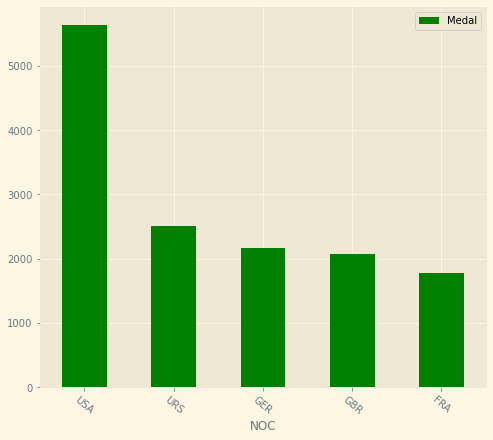

In [14]:
####top 5 team total winnig medals


style.use('Solarize_Light2')

plt.figure(figsize=(8,7))

explode=[0.0,0.0,0.0,0.0,0.2]

most_medals.plot(kind='bar',fontsize=10,color='g')

plt.xticks(rotation=-40)

plt.legend(loc=1,fontsize=10,labelcolor='0',)
plt.show()

In [39]:
top10_sports = df['Sport'].value_counts().sort_values(ascending=False).head(10)
top10_sports

Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: Sport, dtype: int64

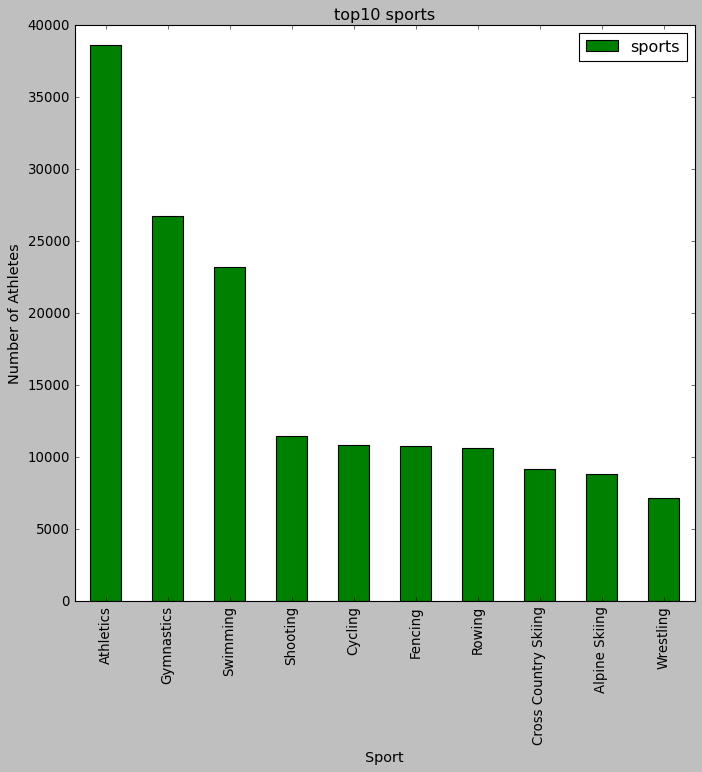

In [40]:
style.use('classic')

plt.figure(figsize=(10,9))

top10_sports.plot(kind='bar',color='g')


plt.title('top10 sports')
plt.xlabel('Sport',fontsize=13)
plt.ylabel('Number of Athletes',fontsize=13)

plt.legend(['sports'])
plt.show()

In [17]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [19]:
medal=df['Medal'].value_counts()

In [20]:
medal

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

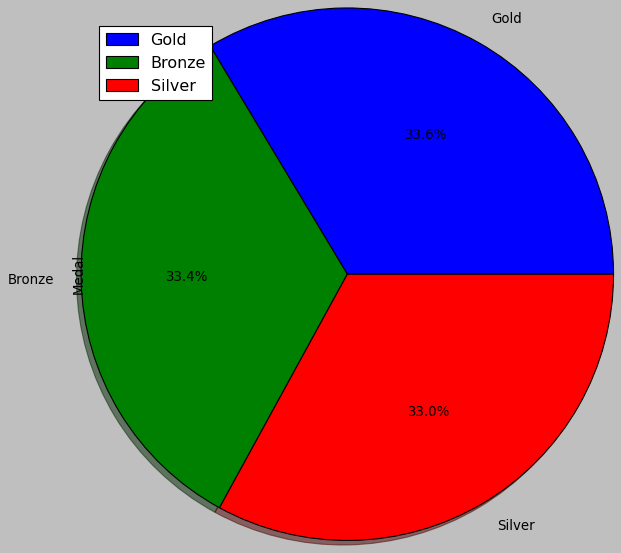

In [21]:
style.use('classic')

plt.figure(figsize=(10,8))



medal.plot(kind='pie',shadow=True,autopct='%0.1f%%',radius=1.3)

plt.legend(loc=2)
plt.show()

In [22]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [23]:
df['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

In [24]:
Gender = df['Sex'].value_counts()
Gender

M    196594
F     74522
Name: Sex, dtype: int64

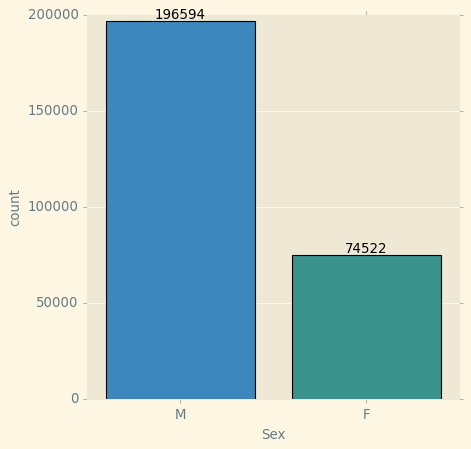

In [25]:
style.use('Solarize_Light2')

plt.figure(figsize=(6,6))

ax=sns.countplot(data=df,x='Sex')
ax.bar_label(ax.containers[0])


plt.show()

In [26]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [27]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [28]:
gold_winner=df[(df['Sex']=='F') &(df['Medal']=='Gold')&(df['Year']==2008)].head(5)
gold_winner

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
1527,846,Valerie Kasanita Adams-Vili (-Price),F,23.0,193.0,120.0,New Zealand,NZL,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,Gold
1772,980,"Rebecca ""Becky"" Adlington",F,19.0,179.0,70.0,Great Britain,GBR,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 400 metres Freestyle,Gold
1773,980,"Rebecca ""Becky"" Adlington",F,19.0,179.0,70.0,Great Britain,GBR,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 800 metres Freestyle,Gold
2099,1169,Marilyn Agliotti,F,29.0,172.0,58.0,Netherlands,NED,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,Gold


In [29]:
medal_wins_by_country = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])].groupby(['NOC', 'Medal'])['ID'].count().unstack()

In [30]:
medal_wins_by_country 

Medal,Bronze,Gold,Silver
NOC,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,4.0
ANZ,5.0,20.0,4.0
ARG,91.0,91.0,92.0
...,...,...,...
VIE,NaN,1.0,3.0
WIF,5.0,NaN,NaN
YUG,93.0,130.0,167.0


In [31]:
medal_wins_by_country['Total_Medals'] = medal_wins_by_country.sum(axis=1)

In [32]:
top_countries = medal_wins_by_country.nlargest(10, 'Total_Medals')
top_countries

Medal,Bronze,Gold,Silver,Total_Medals
NOC,,,,
USA,1358.0,2638.0,1641.0,5637.0
URS,689.0,1082.0,732.0,2503.0
GER,746.0,745.0,674.0,2165.0
GBR,651.0,678.0,739.0,2068.0
FRA,666.0,501.0,610.0,1777.0
ITA,531.0,575.0,531.0,1637.0
SWE,535.0,479.0,522.0,1536.0
CAN,451.0,463.0,438.0,1352.0
AUS,517.0,348.0,455.0,1320.0


In [33]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [34]:
df['Season'].value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

In [35]:
df['Age'].max()

97.0

In [36]:
trace1=go.Scatter(x=df['Name'] , y =data['Medal'],marker={'color':'#9467bd'})



data=[trace1]

              
layout=go.Layout(title='gold medal winners',
                xaxis={'title':'Player name'},
                yaxis={'title':'no of gold medals'})
                #barmode='overlay')

fig=go.Figure(data=data,layout=layout)

fig.show()

NameError: name 'data' is not defined

In [ ]:
df[(df['Medal']=='Gold')].count().sort_values()

In [ ]:
df['Medal'].value_counts()

In [ ]:
data=df[(df['Medal']=='Gold') & (df['Name'])].head(5)
data


In [ ]:
data

In [ ]:
df.Medal.count()

In [ ]:
print(plt.style.available)

In [ ]:
#df = px.data.gapminder().query("continent=='Oceania'")
fig = px.bar(df, x="Medal", y='Sex',color='Medal')
fig.show()